# Online PyEmittance

The following will work either on a production system, or with a simulated EPICS server.

For local development, start a simulated EPICS server using the `simulated_epics.ipynb` notebook, or run in a separate process:

```python
from pyemittance.simulation_server import start_server
start_server()
```

In [1]:
from pyemittance import PyEmittance, print_logging
import numpy as np
print_logging() # Print log messages here

In [2]:
meas = PyEmittance(config_name='LCLS2_OTR0H04')
meas.online = True

# Set some other options
meas.add_pnts = False
meas.num_points = 7   # only matters if adapt_ranges is used.
meas.adapt_ranges = True  # If helping, will ensure there are at least 7 total points
meas.check_sym = True
meas.infl_check = True

meas.show_plots = True
meas

In [3]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 1,
 'background_im': '/home/physics3/ml_tuning/20220805_LCLS2_inj/example_images/bg_8_6_22.npy',
 'amp_threshold': 150,
 'min_sigma': 3,
 'max_sigma': 700,
 'max_samples': 1,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

2023-01-06 18:28:16,044 | INFO : Running online!
2023-01-06 18:28:16,086 | INFO : EPICS put QUAD:HTR:120:BCTRL = -6
2023-01-06 18:28:17,111 | INFO : 2023-01-06_18-28-17-111591
2023-01-06 18:28:17,235 | INFO : EPICS put QUAD:HTR:120:BCTRL = -4
2023-01-06 18:28:17,635 | INFO : 2023-01-06_18-28-17-635551
2023-01-06 18:28:17,742 | INFO : EPICS put QUAD:HTR:120:BCTRL = -2
2023-01-06 18:28:18,216 | INFO : 2023-01-06_18-28-18-216051
2023-01-06 18:28:18,329 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0
2023-01-06 18:28:18,706 | INFO : 2023-01-06_18-28-18-706535
2023-01-06 18:28:18,808 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.7544092853780319
2023-01-06 18:28:19,184 | INFO : 2023-01-06_18-28-19-184156
2023-01-06 18:28:19,358 | INFO : EPICS put QUAD:HTR:120:BCTRL = -0.21200773781502658
2023-01-06 18:28:19,749 | INFO : 2023-01-06_18-28-19-749511
2023-01-06 18:28:19,855 | INFO : EPICS put QUAD:HTR:120:BCTRL = 0.3303938097479787
2023-01-06 18:28:20,239 | INFO : 2023-01-06_18-28-20-239737
2023-01-06 1

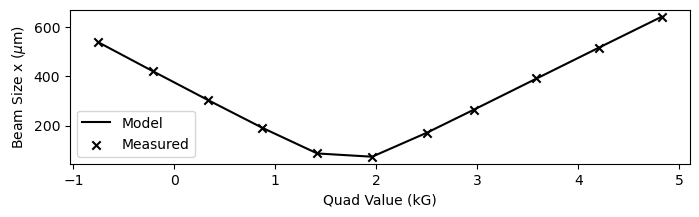

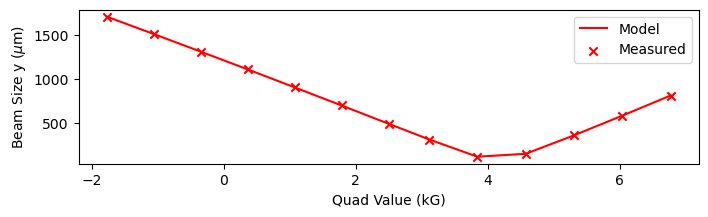

In [4]:
result = meas.measure_emittance()

# Examine results

In [5]:
import matplotlib.pyplot as plt

In [6]:
result

{'quadvalsx': array([-0.75440929, -0.21200774,  0.33039381,  0.87279536,  1.4151969 ,
         1.95759845,  2.5       ,  2.96491561,  3.5848031 ,  4.20469058,
         4.82457806]),
 'beamsizesx': array([5.40129122e-04, 4.19851433e-04, 3.04046632e-04, 1.90685689e-04,
        8.74068041e-05, 7.41578889e-05, 1.71881317e-04, 2.64160427e-04,
        3.91322626e-04, 5.13910847e-04, 6.39701345e-04]),
 'beamsizeserrx': array([0.03205535, 0.02262757, 0.01213688, 0.00636714, 0.00172975,
        0.00147617, 0.00590175, 0.01222253, 0.02011365, 0.03211084,
        0.0422008 ]),
 'error_x': False,
 'emit_x': 6.394802463047207e-09,
 'norm_emit_x': 1.0011248763282702e-06,
 'beta_x': 9.99961976519004,
 'alpha_x': -1.9944785201670479,
 'emit_x_err': 1.7837441612879904e-07,
 'norm_emit_x_err': 2.7925032292862724e-05,
 'beta_x_rel_err': 27.8936553802166,
 'alpha_x_rel_err': -1.7482326436897377e-15,
 'sigma_11': 6.39455931039728e-08,
 'sigma_12': 1.2754296153258986e-08,
 'sigma_22': 3.18341826270096e-09,


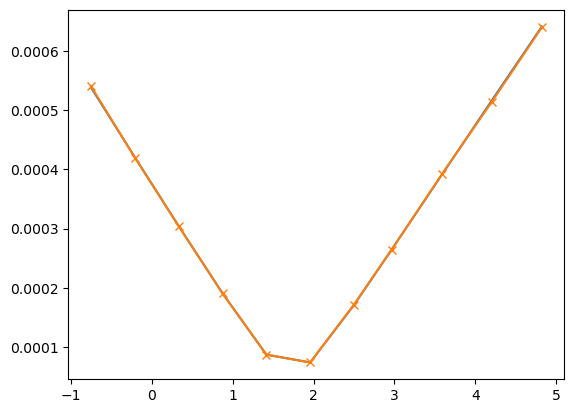

In [7]:
plt.plot(result['quadvalsx'], np.sqrt(result['screen_sigma_11']))
plt.plot(result['quadvalsx'], result['beamsizesx'], marker='x')

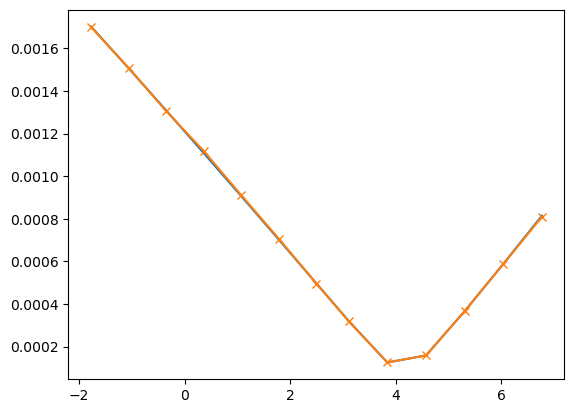

In [8]:
plt.plot(result['quadvalsy'], np.sqrt(result['screen_sigma_33']))
plt.plot(result['quadvalsy'], result['beamsizesy'], marker='x')

# Interactively change the quad and acquire the screen image

0.00037486171231124573


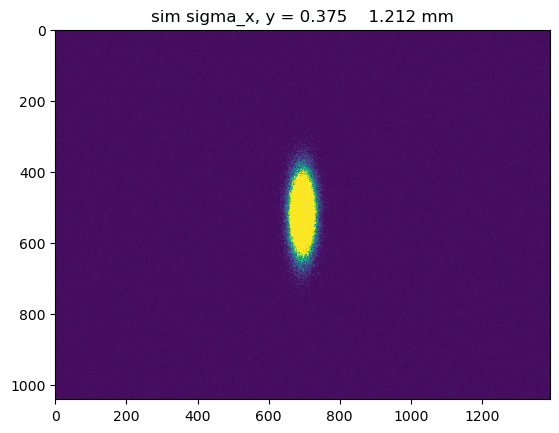

In [9]:
import epics
import matplotlib.pyplot as plt

from ipywidgets import interact

def f(quad_value):
    epics.caput('QUAD:HTR:120:BCTRL', quad_value)
    a = epics.caget('OTRS:HTR:330:Image:ArrayData').reshape(1040, 1392)
    sigma_x = epics.caget('sim_screen_sigma_x')
    sigma_y = epics.caget('sim_screen_sigma_y')  
    print(sigma_x)
    plt.imshow(a, vmax=128)
    plt.title(f'sim sigma_x, y = {sigma_x*1e3:0.3f}    {sigma_y*1e3:0.3f} mm')
    
# interact(f, quad_value=(-4, 4, .1))    
f(0)